In [3]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import sklearn 
import scipy
import seaborn as sns
import graphviz

print("matplotlib: " + matplotlib.__version__)
print("numpy: " + np.__version__)
print("pandas: " + pd.__version__)
print("scikit-learn: " + sklearn.__version__)
print("scipy: " + scipy.__version__)
print("seaborn: " + sns.__version__)
print("python-graphviz: " + graphviz.__version__)

D:\Python\Anaconda3\envs\py3iaml\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


matplotlib: 2.2.3
numpy: 1.15.0
pandas: 0.23.4
scikit-learn: 0.19.1
scipy: 1.1.0
seaborn: 0.9.0
python-graphviz: 0.8.4


In [4]:
# Read file regression_part1.csv
import os

path_regression_part1 = os.path.join(os.getcwd(), 'data', 'regression_part1.csv')
data_regression_part1 = pd.read_csv(path_regression_part1, delimiter = ',')

In [5]:
data_regression_part1

,revision_time,exam_score
0,2.723,27.682
1,2.844,22.998
2,3.303,19.765
3,3.588,24.481
4,4.050,22.974
5,4.080,27.086
6,5.674,26.136
7,6.060,27.038
8,6.347,31.283
9,6.819,14.731


In [6]:
data_regression_part1.describe()

,revision_time,exam_score
count,50.000000,50.000000
mean,22.220020,49.919860
std,13.986112,20.925594
min,2.723000,14.731000
25%,8.570500,32.125000
50%,21.688000,47.830500
75%,32.257500,65.069750
max,48.011000,94.945000


Data size: 50
Data range: 
    r_time.min = 2.72
    r_time.max = 48.01
    e_score.min = 14.7
    e_score.max = 94.9
Data type: double, 3 decimal places

In [7]:
#IMPORTANT
r_time = np.array(data_regression_part1['revision_time'],dtype=np.float).reshape((-1, 1))
e_score = np.array(data_regression_part1['exam_score'],dtype=np.float)

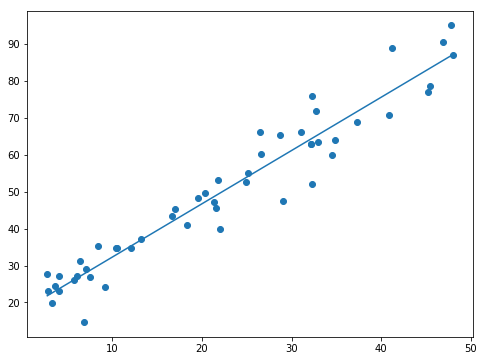

=====
Coefficient
[1.44114091]
=====
MSE_sklearn
30.985472614541305
=====
=====
Intercept
17.89768025835017
=====


In [8]:
# NO Pre-pend
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression(fit_intercept = True)
plot_fit = linear_regression.fit(r_time, e_score)

x = r_time
y = plot_fit.predict(r_time)

plt.figure(figsize=(8,6))
plt.scatter(r_time, e_score)
plt.plot(x, y)
plt.show()

from sklearn import metrics
print("=====")
print("Coefficient")
print(plot_fit.coef_)
print("=====")
print("MSE_sklearn")
print(metrics.mean_squared_error(e_score, y))
print("=====")
print("=====")
print("Intercept")
print(plot_fit.intercept_)
print("=====")

In [9]:
#Pre pend
from sklearn.linear_model import LinearRegression

pre_pend = np.ones(50).reshape((-1, 1))

new_r_time = np.append(pre_pend, r_time, axis = 1)
new_e_score = e_score.reshape((-1, 1))

print(new_r_time.shape)
print(new_e_score.shape)

(50, 2)
(50, 1)


=====
Coefficient
[[17.89768026  1.44114091]]
=====
new_MSE_sklearn
30.9854726145413
=====


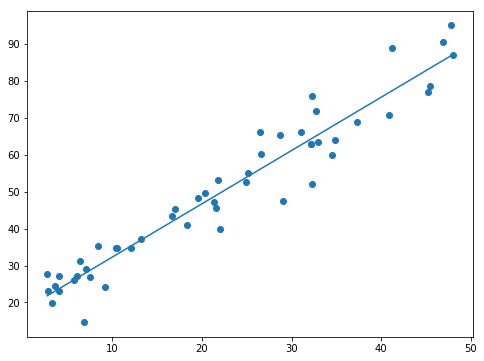

In [10]:
from sklearn.linear_model import LinearRegression
new_linear_regression = LinearRegression(fit_intercept = False)
new_fit = new_linear_regression.fit(new_r_time, new_e_score)

new_x = new_r_time
new_y = new_fit.predict(new_x)

plt.figure(figsize=(8,6))
plt.scatter(r_time, e_score)
plt.plot(r_time, new_y)
plt.show

from sklearn import metrics
print("=====")
print("Coefficient")
print(new_fit.coef_)
print("=====")
print("new_MSE_sklearn")
MSE_sklearn = metrics.mean_squared_error(e_score, new_y)
print(metrics.mean_squared_error(e_score, new_y))
print("=====")

In [11]:
#Report the parameters w:
print("=====")
print("w")
print(new_fit.coef_)
print("=====")

=====
w
[[17.89768026  1.44114091]]
=====


In [12]:
#my estimating w
my_y = [my_y for my_y in data_regression_part1['exam_score']]
my_r_time = np.array(data_regression_part1['revision_time']).reshape(-1, 1)
my_x = np.array([[1,my_x[0]] for my_x in my_r_time])
my_w = (np.linalg.inv(my_x.T.dot(my_x)).dot(my_x.T).dot(my_y))

In [13]:
my_w

array([17.89768026,  1.44114091])

In [14]:
predict_y = my_x.dot(my_w)

In [15]:
E = []
for i in range(len(my_y)):
    E.append(predict_y[i] - y[i])

In [16]:
SE = []
for j in E:
    SE.append(j**2)

In [17]:
my_MSE = np.mean(np.array(SE))

print(MSE_sklearn)
print("=====")
print(my_MSE)

30.9854726145413
=====
2.6076586082985766e-28


In [18]:
print("=====")
print("closed-form w")
print(my_w)
print("=====")
print("regression coefficient")
print(new_fit.coef_)
print("=====")

=====
closed-form w
[17.89768026  1.44114091]
=====
regression coefficient
[[17.89768026  1.44114091]]
=====


In [19]:
print(metrics.mean_squared_error(e_score, new_y))
print("=====")
print(my_MSE)

30.9854726145413
=====
2.6076586082985766e-28


In [20]:
w1 = np.linspace(-2,2, 100).reshape((-1, 1))
w0 = np.ones(100).reshape((-1,1))
for i in range(len(w0)):
    w0[i] = 20
g_w = np.append(w0, w1, axis=1)

In [21]:
a = my_x.dot(g_w[99])

a

array([ 25.446,  25.688,  26.606,  27.176,  28.1  ,  28.16 ,  31.348,
        32.12 ,  32.694,  33.638,  34.196,  35.03 ,  36.712,  38.428,
        40.728,  41.02 ,  44.204,  46.374,  53.384,  53.954,  56.66 ,
        59.198,  60.642,  62.56 ,  63.156,  63.596,  64.096,  69.898,
        70.294,  72.99 ,  73.07 ,  77.374,  78.11 ,  82.086,  84.352,
        84.406,  84.452,  84.536,  85.422,  85.772,  88.978,  89.778,
        94.598, 101.75 , 102.498, 110.426, 110.794, 113.846, 115.636,
       116.022])

In [22]:
g_MSE = []
for i in range(len(g_w)):
    g_MSE.append(metrics.mean_squared_error(my_x.dot(g_w[i]), my_y))
    
index_min = np.argmin(np.array(g_MSE))
g_MSE[index_min]
g_w[index_min]

array([20.        ,  1.35353535])

<function matplotlib.pyplot.show(*args, **kw)>

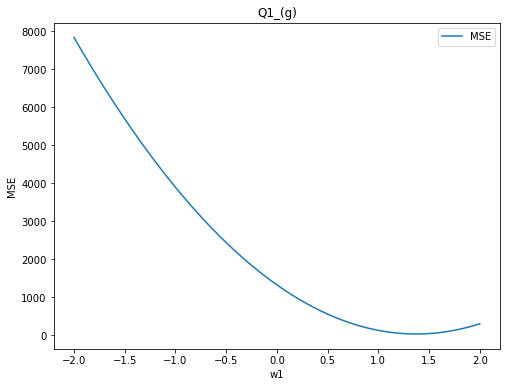

In [23]:
plt.figure(figsize=(8,6))
plt.plot(w1, np.array(g_MSE), label = "MSE")
plt.xlabel('w1')
plt.ylabel('MSE')
plt.title("Q1_(g)")
plt.legend()
plt.show

In [24]:
# Read file regression_part2.csv
import os

path_regression_part2 = os.path.join(os.getcwd(), 'data', 'regression_part2.csv')
data_regression_part2 = pd.read_csv(path_regression_part2, delimiter = ',')

data_regression_part2

,input,output
0,2.728,9.088
1,3.244,12.786
2,-4.164,-10.016
3,4.875,32.976
4,3.329,10.437
5,4.268,21.681
6,-2.879,-5.204
7,-2.276,-1.465
8,2.688,8.539
9,2.780,6.929


In [25]:
#IMPORTANT
input_p2 = np.array(data_regression_part2['input']).reshape((-1, 1))
output_p2 = np.array(data_regression_part2['output'])

In [26]:
input_p2

array([[ 2.728],
       [ 3.244],
       [-4.164],
       [ 4.875],
       [ 3.329],
       [ 4.268],
       [-2.879],
       [-2.276],
       [ 2.688],
       [ 2.78 ],
       [ 3.874],
       [-4.826],
       [ 2.633],
       [ 2.815],
       [ 4.441],
       [ 1.345],
       [-4.616],
       [ 1.405],
       [-2.588],
       [ 0.992],
       [ 3.276],
       [-0.597],
       [-3.772],
       [-2.848],
       [ 4.31 ]])

In [27]:
from sklearn.preprocessing import PolynomialFeatures

x_d1 = PolynomialFeatures(degree=1).fit_transform(input_p2)
x_d2 = PolynomialFeatures(degree=2).fit_transform(input_p2)
x_d3 = PolynomialFeatures(degree=3).fit_transform(input_p2)
x_d4 = PolynomialFeatures(degree=4).fit_transform(input_p2)

fit_d1 = LinearRegression(fit_intercept = False).fit(x_d1, output_p2)
fit_d2 = LinearRegression(fit_intercept = False).fit(x_d2, output_p2)
fit_d3 = LinearRegression(fit_intercept = False).fit(x_d3, output_p2)
fit_d4 = LinearRegression(fit_intercept = False).fit(x_d4, output_p2)

y_d1 = fit_d1.predict(x_d1)
y_d2 = fit_d2.predict(x_d2)
y_d3 = fit_d3.predict(x_d3)
y_d4 = fit_d4.predict(x_d4)

In [28]:
raw_d2 = np.append(input_p2, y_d2.reshape((-1,1)), axis = 1)

raw_d3 = np.append(input_p2, y_d3.reshape((-1,1)), axis = 1)

raw_d4 = np.append(input_p2, y_d4.reshape((-1,1)), axis = 1)

In [29]:
new_sted_d2 = raw_d2[np.argsort(raw_d2[:,0])]

new_sted_d3 = raw_d3[np.argsort(raw_d3[:,0])]

new_sted_d4 = raw_d4[np.argsort(raw_d4[:,0])]

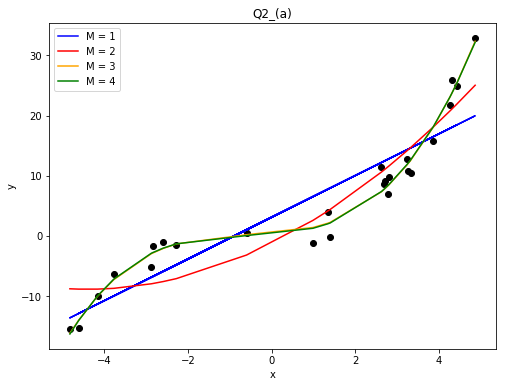

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(input_p2, output_p2, c="black")
plt.plot(input_p2 , y_d1, label = "M = 1", c="blue")
plt.plot(new_sted_d2[:,0] , new_sted_d2[:,1],label = "M = 2",c="red")
plt.plot(new_sted_d3[:,0] , new_sted_d3[:,1],label = "M = 3",c="orange")
plt.plot(new_sted_d4[:,0] , new_sted_d4[:,1],label = "M = 4",c="green")
plt.xlabel('x')
plt.ylabel('y')
plt.title("Q2_(a)")
plt.legend()

In [31]:
sted_d2 = np.sort(raw_d2, axis=0)
sted_d3 = np.sort(raw_d3, axis=0)
sted_d4 = np.sort(raw_d4, axis=0)

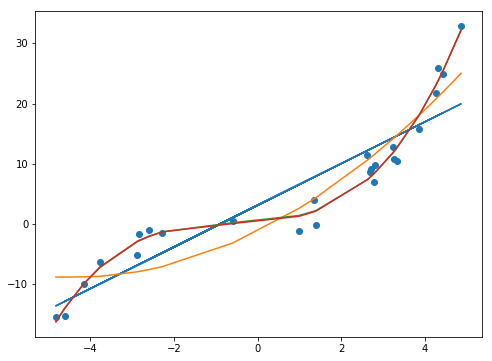

In [32]:
plt.figure(figsize=(8,6))
plt.scatter(input_p2, output_p2)
plt.plot(input_p2 , y_d1)
plt.plot(sted_d2[:,0] , sted_d2[:,1])
plt.plot(sted_d3[:,0] , sted_d3[:,1])
plt.plot(sted_d4[:,0] , sted_d4[:,1])

MSE
24.744378032672856
=====
17.352926937873296
=====
2.7447567192524276
=====
2.7389111790755383


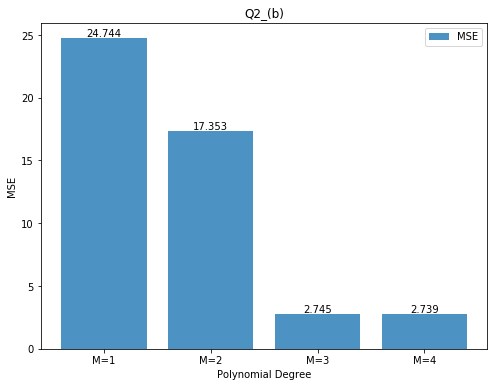

In [33]:
print("MSE")
MSE_d1 = metrics.mean_squared_error(output_p2, y_d1)
print(MSE_d1)
print("=====")
MSE_d2 = metrics.mean_squared_error(output_p2, y_d2)
print(MSE_d2)
print("=====")
MSE_d3 = metrics.mean_squared_error(output_p2, y_d3)
print(MSE_d3)
print("=====")
MSE_d4 = metrics.mean_squared_error(output_p2, y_d4)
print(MSE_d4)

MSE_p2 = np.ones(4)
MSE_p2[0] = MSE_d1
MSE_p2[1] = MSE_d2
MSE_p2[2] = MSE_d3
MSE_p2[3] = MSE_d4

bar_x = ["M=1", "M=2", "M=3", "M=4"]

plt.figure(figsize=(8,6))
plt.bar(bar_x, MSE_p2, label = "MSE", alpha = 0.8)
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.title("Q2_(b)")
plt.text("M=1", MSE_d1, '%.3f' % MSE_d1, ha='center', va='bottom', fontsize=10)
plt.text("M=2", MSE_d2, '%.3f' % MSE_d2, ha='center', va='bottom', fontsize=10)
plt.text("M=3", MSE_d3, '%.3f' % MSE_d3, ha='center', va='bottom', fontsize=10)
plt.text("M=4", MSE_d4, '%.3f' % MSE_d4, ha='center', va='bottom', fontsize=10)
plt.legend()

In [34]:
c1 = -4.0
c2 = -2.0
c3 = 2.0
c4 = 4.0

a1 = 0.2
a2 = 100
a3 = 1000

In [35]:
def setRBF(x, c, a):
    import math
    rbf = math.exp((-0.5*(x-c)**2)/(a**2))
    return rbf

In [36]:
Q2d_a1_c1 = []
for i in input_p2:
    Q2d_a1_c1.append(setRBF(i, c1, a1))

Q2d_a1_c2 = []
for i in input_p2:
    Q2d_a1_c2.append(setRBF(i, c2, a1))
    
Q2d_a1_c3 = []
for i in input_p2:
    Q2d_a1_c3.append(setRBF(i, c3, a1))
    
Q2d_a1_c4 = []
for i in input_p2:
    Q2d_a1_c4.append(setRBF(i, c4, a1))
    
Q2d_a1_c1 = np.array(Q2d_a1_c1).reshape((-1,1))
Q2d_a1_c2 = np.array(Q2d_a1_c2).reshape((-1,1))
Q2d_a1_c3 = np.array(Q2d_a1_c3).reshape((-1,1))
Q2d_a1_c4 = np.array(Q2d_a1_c4).reshape((-1,1))

#a=0.2
Q2d_a1 = np.append(np.ones(25).reshape((-1,1)), Q2d_a1_c1, axis = 1)
Q2d_a1 = np.append(Q2d_a1, Q2d_a1_c2, axis = 1)
Q2d_a1 = np.append(Q2d_a1, Q2d_a1_c3, axis = 1)          
Q2d_a1 = np.append(Q2d_a1, Q2d_a1_c4, axis = 1)

In [37]:
#new_fit_a1 = LinearRegression().fit(Q2d_a1, output_p2)
#new_predict_a1 = new_fit_a1.predict(Q2d_a1)

#new_raw_a1 = np.append(input_p2, new_predict_a1.reshape(-1,1), axis = 1)
#new_sort_a1 = np.sort(new_raw_a1, axis=0)

#plt.scatter(input_p2, new_predict_a1)
#plt.scatter(input_p2, output_p2)
#plt.plot(new_sort_a1[:,0],new_sort_a1[:,1])

In [38]:
#new_raw_a1

In [39]:
#new_sort_a1

In [40]:
Q2d_a2_c1 = []
for i in input_p2:
    Q2d_a2_c1.append(setRBF(i, c1, a2))

Q2d_a2_c2 = []
for i in input_p2:
    Q2d_a2_c2.append(setRBF(i, c2, a2))
    
Q2d_a2_c3 = []
for i in input_p2:
    Q2d_a2_c3.append(setRBF(i, c3, a2))
    
Q2d_a2_c4 = []
for i in input_p2:
    Q2d_a2_c4.append(setRBF(i, c4, a2))
    
Q2d_a2_c1 = np.array(Q2d_a2_c1).reshape((-1,1))
Q2d_a2_c2 = np.array(Q2d_a2_c2).reshape((-1,1))
Q2d_a2_c3 = np.array(Q2d_a2_c3).reshape((-1,1))
Q2d_a2_c4 = np.array(Q2d_a2_c4).reshape((-1,1))

#a=0.2
Q2d_a2 = np.append(np.ones(25).reshape((-1,1)), np.array(Q2d_a2_c1).reshape((-1,1)), axis = 1)
Q2d_a2 = np.append(Q2d_a2, Q2d_a2_c2, axis = 1)
Q2d_a2 = np.append(Q2d_a2, Q2d_a2_c3, axis = 1)          
Q2d_a2 = np.append(Q2d_a2, Q2d_a2_c4, axis = 1)  

In [41]:
Q2d_a3_c1 = []
for i in input_p2:
    Q2d_a3_c1.append(setRBF(i, c1, a3))

Q2d_a3_c2 = []
for i in input_p2:
    Q2d_a3_c2.append(setRBF(i, c2, a3))
    
Q2d_a3_c3 = []
for i in input_p2:
    Q2d_a3_c3.append(setRBF(i, c3, a3))
    
Q2d_a3_c4 = []
for i in input_p2:
    Q2d_a3_c4.append(setRBF(i, c4, a3))
    
Q2d_a3_c1 = np.array(Q2d_a3_c1).reshape((-1,1))
Q2d_a3_c2 = np.array(Q2d_a3_c2).reshape((-1,1))
Q2d_a3_c3 = np.array(Q2d_a3_c3).reshape((-1,1))
Q2d_a3_c4 = np.array(Q2d_a3_c4).reshape((-1,1))

#a=0.2
Q2d_a3 = np.append(np.ones(25).reshape((-1,1)),Q2d_a3_c1, axis = 1)
Q2d_a3 = np.append(Q2d_a3, Q2d_a3_c2, axis = 1)
Q2d_a3 = np.append(Q2d_a3, Q2d_a3_c3, axis = 1)          
Q2d_a3 = np.append(Q2d_a3, Q2d_a3_c4, axis = 1)  

In [42]:
fit_a1 = LinearRegression(fit_intercept = False).fit(Q2d_a1, output_p2)
predict_a1 = fit_a1.predict(Q2d_a1)

fit_a2 = LinearRegression(fit_intercept = False).fit(Q2d_a2, output_p2)
predict_a2 = fit_a2.predict(Q2d_a2)

fit_a3 = LinearRegression(fit_intercept = False).fit(Q2d_a3, output_p2)
predict_a3 = fit_a3.predict(Q2d_a3)

In [43]:
raw_a1 = np.append(input_p2, predict_a1.reshape(-1,1), axis = 1)
sort_a1 = raw_a1[np.argsort(raw_a1[:,0])]

raw_a2 = np.append(input_p2, predict_a2.reshape(-1,1), axis = 1)
sort_a2 = raw_a2[np.argsort(raw_a2[:,0])]

raw_a3 = np.append(input_p2, predict_a3.reshape(-1,1), axis = 1)
sort_a3 = raw_a3[np.argsort(raw_a3[:,0])]

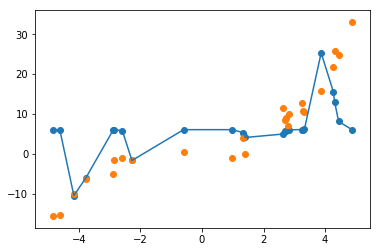

In [45]:
plt.scatter(input_p2, predict_a1)
plt.scatter(input_p2, output_p2)
plt.plot(sort_a1[:,0],sort_a1[:,1])

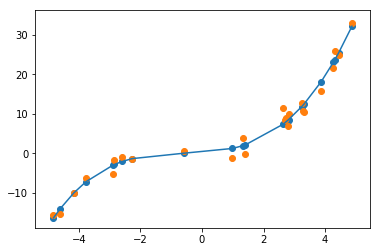

In [46]:
plt.scatter(input_p2, predict_a2)
plt.scatter(input_p2, output_p2)
plt.plot(sort_a2[:,0],sort_a2[:,1])

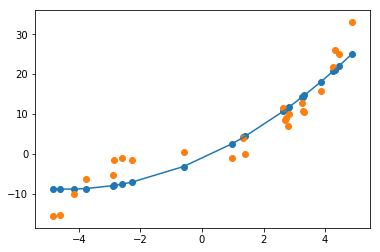

In [47]:
plt.scatter(input_p2, predict_a3)
plt.scatter(input_p2, output_p2)
plt.plot(sort_a3[:,0],sort_a3[:,1])

In [48]:
#plt.figure(figsize=(8,6))
#plt.scatter(input_p2, output_p2)
#plt.plot(new_sort_a1[:,0],new_sort_a1[:,1],"r")
#plt.plot(sort_a2[:,0],sort_a2[:,1],"b")
#plt.plot(sort_a3[:,0],sort_a3[:,1],"y")

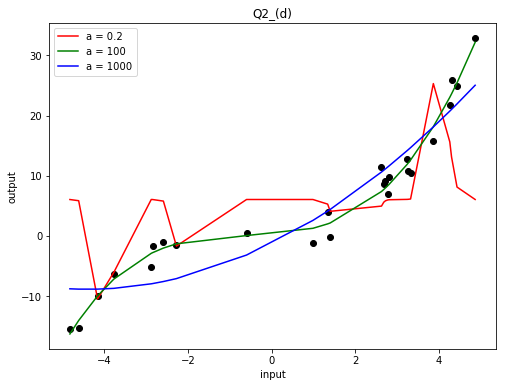

In [49]:
plt.figure(figsize=(8,6))
plt.scatter(input_p2, output_p2, c= "black")
plt.plot(sort_a1[:,0],sort_a1[:,1],"r", label = "a = 0.2")
plt.plot(sort_a2[:,0],sort_a2[:,1],"g", label = "a = 100")
plt.plot(sort_a3[:,0],sort_a3[:,1],"b", label = "a = 1000")
plt.xlabel('input')
plt.ylabel('output')
plt.title("Q2_(d)")
plt.legend()

In [50]:
# Read file faces_train.csv and faces_test.csv
import os

path_face_train = os.path.join(os.getcwd(), 'data', 'faces_train_data.csv')
data_face_train = pd.read_csv(path_face_train, delimiter = ',')

path_face_test = os.path.join(os.getcwd(), 'data', 'faces_test_data.csv')
data_face_test = pd.read_csv(path_face_test, delimiter = ',')

In [51]:
data_face_train.head(5)

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,y63,x64,y64,x65,y65,x66,y66,x67,y67,smiling
0,-1.861,1.350,-1.835,0.892,-1.756,0.458,-1.704,-0.000,-1.625,-0.458,...,-0.160,0.498,-0.343,0.183,-0.389,-0.026,-0.389,-0.210,-0.389,0
1,-1.920,1.523,-1.920,1.066,-1.833,0.571,-1.746,0.076,-1.571,-0.343,...,-0.076,0.742,-0.076,0.262,-0.267,0.000,-0.305,-0.262,-0.267,1
2,-1.247,1.177,-1.256,0.806,-1.183,0.403,-0.983,0.008,-0.746,-0.371,...,-0.055,1.247,0.016,0.464,-0.506,0.173,-0.553,-0.082,-0.537,1
3,-1.660,1.812,-1.701,1.324,-1.660,0.801,-1.620,0.314,-1.498,-0.139,...,-0.070,0.891,-0.035,0.283,-0.279,0.000,-0.279,-0.283,-0.244,0
4,-1.776,1.551,-1.693,1.140,-1.549,0.729,-1.363,0.318,-1.115,-0.075,...,-0.093,0.764,0.056,0.227,-0.112,0.041,-0.150,-0.145,-0.131,0


In [52]:
data_face_test.describe()

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,y63,x64,y64,x65,y65,x66,y66,x67,y67,smiling
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,...,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,-1.924105,1.466505,-1.913906,1.015347,-1.854442,0.556578,-1.742358,0.100410,-1.549113,-0.322024,...,-0.109595,0.686934,-0.101417,0.221621,-0.256826,0.004443,-0.281469,-0.211166,-0.262411,0.493333
std,0.586384,0.412054,0.548511,0.389851,0.529543,0.368793,0.524712,0.348176,0.498277,0.322613,...,0.049170,0.202535,0.147125,0.082986,0.141866,0.073667,0.139187,0.087036,0.137586,0.500164
min,-3.846000,-2.116000,-3.673000,-2.341000,-3.487000,-2.539000,-3.287000,-2.624000,-3.005000,-2.511000,...,-0.280000,-0.133000,-0.672000,-0.282000,-1.087000,-0.507000,-1.109000,-0.732000,-1.087000,0.000000
25%,-2.250000,1.243000,-2.220250,0.816000,-2.150000,0.364000,-2.049000,-0.092250,-1.843000,-0.502250,...,-0.138000,0.580000,-0.180000,0.185750,-0.347000,-0.027000,-0.374000,-0.254000,-0.353000,0.000000
50%,-1.949000,1.465000,-1.921000,1.016000,-1.860500,0.562500,-1.758500,0.105500,-1.582500,-0.316500,...,-0.108000,0.704000,-0.097500,0.225000,-0.240000,0.000000,-0.263000,-0.213000,-0.244000,0.000000
75%,-1.626250,1.686500,-1.627750,1.221500,-1.562750,0.753500,-1.448500,0.302000,-1.282000,-0.128500,...,-0.078000,0.816000,-0.000000,0.264000,-0.142000,0.036000,-0.166000,-0.175000,-0.155000,1.000000
max,1.613000,3.641000,1.067000,3.205000,0.522000,2.718000,0.000000,2.510000,0.309000,2.213000,...,0.248000,1.269000,0.702000,0.603000,0.248000,0.411000,0.041000,0.259000,0.168000,1.000000


In [53]:
smile_train = data_face_train[data_face_train['smiling'] == 1].drop('smiling', axis = 1)
n_smile_train = data_face_train[data_face_train['smiling'] == 0].drop('smiling', axis = 1)

In [54]:
smile_train.shape

(2335, 136)

In [55]:
x_smile_train = smile_train.iloc[:,[i%2==0 for i in range(len(smile_train.columns))]]
y_smile_train = smile_train.iloc[:,[i%2==1 for i in range(len(smile_train.columns))]]

x_smile_train_mean = x_smile_train.describe().loc['mean']
y_smile_train_mean = y_smile_train.describe().loc['mean']

In [56]:
x_n_smile_train = n_smile_train.iloc[:,[i%2==0 for i in range(len(n_smile_train.columns))]]
y_n_smile_train = n_smile_train.iloc[:,[i%2==1 for i in range(len(n_smile_train.columns))]]

x_n_smile_train_mean = x_n_smile_train.describe().loc['mean']
y_n_smile_train_mean = y_n_smile_train.describe().loc['mean']

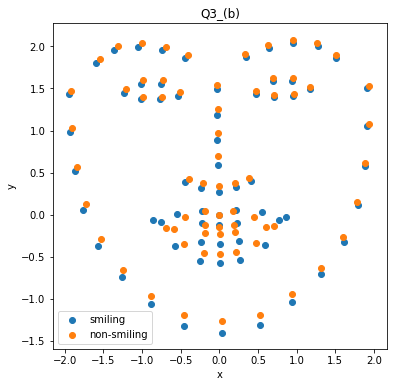

In [57]:
plt.figure(figsize=(6,6))
plt.scatter(x_smile_train_mean, y_smile_train_mean, label = "smiling")
plt.scatter(x_n_smile_train_mean, y_n_smile_train_mean, label = "non-smiling")
plt.xlabel('x')
plt.ylabel('y')
plt.title("Q3_(b)")
plt.legend()

In [58]:
from sklearn.tree import DecisionTreeClassifier
max_2 = DecisionTreeClassifier(random_state=2001, max_depth = 2)
max_8 = DecisionTreeClassifier(random_state=2001, max_depth = 8)
max_20 = DecisionTreeClassifier(random_state=2001, max_depth = 20)

In [59]:
clf_train = data_face_train.drop('smiling', axis = 1)
clf_test = data_face_test.drop('smiling', axis = 1)

clf_train_truth = data_face_train['smiling']
clf_test_truth = data_face_test['smiling']

In [60]:
max_2.fit(clf_train, clf_train_truth)
max_2_train_accuracy = max_2.score(clf_train, clf_train_truth)
max_2_test_accuracy = max_2.score(clf_test, clf_test_truth)

print(max_2_train_accuracy)
print(max_2_test_accuracy)

0.7947916666666667
0.7816666666666666


In [61]:
max_8.fit(clf_train, clf_train_truth)
max_8_train_accuracy = max_8.score(clf_train, clf_train_truth)
max_8_test_accuracy = max_8.score(clf_test, clf_test_truth)

print(max_8_train_accuracy)
print(max_8_test_accuracy)

0.9335416666666667
0.8408333333333333


In [62]:
max_20.fit(clf_train, clf_train_truth)
max_20_train_accuracy = max_20.score(clf_train, clf_train_truth)
max_20_test_accuracy = max_20.score(clf_test, clf_test_truth)

print(max_20_train_accuracy)
print(max_20_test_accuracy)

1.0
0.8158333333333333


In [63]:
max_8.feature_importances_

array([0.        , 0.00171789, 0.00424141, 0.00931392, 0.00099457,
       0.        , 0.00800374, 0.        , 0.        , 0.        ,
       0.00554869, 0.        , 0.        , 0.        , 0.        ,
       0.03554359, 0.        , 0.03275378, 0.        , 0.00569425,
       0.        , 0.        , 0.        , 0.00097483, 0.        ,
       0.00294131, 0.        , 0.        , 0.00221963, 0.00251957,
       0.        , 0.        , 0.        , 0.        , 0.00250062,
       0.        , 0.00097417, 0.00585508, 0.        , 0.        ,
       0.00195484, 0.        , 0.        , 0.00158038, 0.00078737,
       0.00285785, 0.00087485, 0.        , 0.        , 0.00481308,
       0.        , 0.        , 0.        , 0.0015585 , 0.        ,
       0.        , 0.        , 0.00136318, 0.        , 0.08831447,
       0.        , 0.0053233 , 0.        , 0.00246417, 0.00095745,
       0.01742446, 0.        , 0.00141094, 0.        , 0.00125979,
       0.        , 0.        , 0.00330107, 0.        , 0.     

In [64]:
def findMAX(a):
    b = np.zeros(3)
    c = np.zeros(3)
    c[0] = np.max(a)    #最大值
    b[0] = np.where(a==c[0])[0]     #最大``值位置
    new_a = np.delete(a,b[0])

    c[1] = np.max(new_a)    #次大值
    b[1] = np.where(new_a==c[1])[0]     #找出次大值位置。注：位置为新数组位置，无意义
    new_a1 = np.delete(new_a,b[1])

    c[2] = np.max(new_a1)   #第三大值
    b[2] = np.where(new_a1==c[2] )[0]   #找出第三大值位置
    new_a2 = np.delete(new_a1,b[2])
    
    return b,c

In [65]:
findMAX(max_8.feature_importances_)

D:\Python\Anaconda3\envs\py3iaml\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  
D:\Python\Anaconda3\envs\py3iaml\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  # Remove the CWD from sys.path while we load stuff.
D:\Python\Anaconda3\envs\py3iaml\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  


(array([100.,  97.,  59.]), array([0.33040485, 0.08995881, 0.08831447]))

In [66]:
len(max_8.feature_importances_)

136

In [67]:
clf_train.columns[100]

'x50'

In [68]:
clf_train.columns[97]

'y48'

In [69]:
clf_train.columns[59]

'y29'

In [70]:
# Read file classification_eval_1.csv
import os

path_classification_eval_1 = os.path.join(os.getcwd(), 'data', 'classification_eval_1.csv')
classification_eval_1 = pd.read_csv(path_classification_eval_1, delimiter = ',')

In [71]:
classification_eval_1.head(10)

,gt,alg_1,alg_2,alg_3,alg_4
0,0,0.051302,0.000000,0.821882,0.705028
1,0,0.695441,1.000000,1.000000,0.741789
2,1,0.471121,0.913034,0.000000,1.000000
3,1,1.000000,1.000000,0.000000,1.000000
4,0,0.857339,0.000000,0.296797,0.809736
5,0,1.000000,0.000000,0.493186,0.769017
6,0,0.897370,1.000000,0.261861,0.987711
7,0,0.236050,1.000000,0.687067,0.826789
8,0,0.219094,0.131004,0.502369,0.712532
9,0,0.000000,1.000000,1.000000,0.407349


In [72]:
classification_eval_1.describe()

,gt,alg_1,alg_2,alg_3,alg_4
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.202000,0.493739,0.518386,0.491591,0.743101
std,0.401693,0.383203,0.426419,0.304036,0.194130
min,0.000000,0.000000,0.000000,0.000000,0.167336
25%,0.000000,0.074081,0.000000,0.248341,0.597597
50%,0.000000,0.498969,0.549211,0.476655,0.760082
75%,0.000000,0.887967,1.000000,0.732685,0.919085
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
gt = classification_eval_1['gt']
alg_1 = classification_eval_1['alg_1']
alg_2 = classification_eval_1['alg_2']
alg_3 = classification_eval_1['alg_3']
alg_4 = classification_eval_1['alg_4']

np_gt = np.array(gt)
np_alg_1 = np.array(alg_1)
np_alg_2 = np.array(alg_2)
np_alg_3 = np.array(alg_3)
np_alg_4 = np.array(alg_4)

In [74]:
def setT(i):
    if i>=0.5:
        val = 1
    else:
        val = 0
    return val

In [75]:
def biArray(array):
    for i in range(len(array)):
        array[i] = setT(array[i])
    return array

In [76]:
bi_alg_1 = biArray(np_alg_1)
bi_alg_2 = biArray(np_alg_2)
bi_alg_3 = biArray(np_alg_3)
bi_alg_4 = biArray(np_alg_4)

In [77]:
def countAcc(gt, bi_alg):
    count = 0
    for j in range(len(bi_alg)):
        if gt[j] == bi_alg[j]:
            count = count + 1
        else:
            1 == 1
    return count

In [78]:
acc_alg_1 = countAcc(gt, bi_alg_1)/len(gt)
acc_alg_1

0.616

In [79]:
acc_alg_2 = countAcc(gt, bi_alg_2)/len(gt)
acc_alg_2 

0.55

In [80]:
acc_alg_3 = countAcc(gt, bi_alg_3)/len(gt)
acc_alg_3

0.321

In [81]:
acc_alg_4 = countAcc(gt, bi_alg_4)/len(gt)
acc_alg_4

0.329

In [82]:
from sklearn.metrics import roc_auc_score

In [83]:
auc_1 = roc_auc_score(np_gt, np.array(alg_1))
auc_1

0.7320932281198045

In [84]:
auc_2 = roc_auc_score(np_gt, np.array(alg_2))
auc_2

0.6316285763914737

In [85]:
auc_3 = roc_auc_score(np_gt, np.array(alg_3))
auc_3

0.06395009801732053

In [86]:
auc_4 = roc_auc_score(np_gt, np.array(alg_4))
auc_4

0.8473876522990644

In [87]:
fpr_1, tpr_1, thresholds_1 = metrics.roc_curve(np_gt, np.array(alg_1))
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(np_gt, np.array(alg_2))
fpr_3, tpr_3, thresholds_3 = metrics.roc_curve(np_gt, np.array(alg_3))
fpr_4, tpr_4, thresholds_4 = metrics.roc_curve(np_gt, np.array(alg_4))

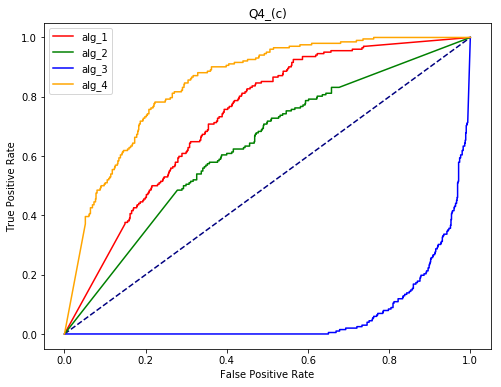

In [88]:
plt.figure(figsize =(8,6))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.plot(fpr_1, tpr_1, "r", label="alg_1")
plt.plot(fpr_2, tpr_2, "g", label="alg_2")
plt.plot(fpr_3, tpr_3, "b", label="alg_3")
plt.plot(fpr_4, tpr_4, "orange", label="alg_4")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Q4_(c)")
plt.legend()